# Import liraries

# Titanic - Dataset EDA (Beginners Friendly)
![Alt Text](https://media.licdn.com/dms/image/C4D12AQHsDRbH7GXOZg/article-cover_image-shrink_720_1280/0/1604989195408?e=1720656000&v=beta&t=qAFWrQQlwbxK0jty_zQEDDCjmU7ICOximE7vT5J1Vbo)


## Introduction to the Titanic Dataset

The Titanic dataset is one of the most iconic datasets used for introductory data analysis and machine learning tasks. It contains information about the passengers aboard the RMS Titanic, which tragically sank on its maiden voyage in April 1912 after colliding with an iceberg.

This dataset is often used for predictive modeling tasks, particularly for predicting whether a passenger survived or not based on various attributes such as age, gender, ticket class, etc. It is a classic binary classification problem: predicting survival (1) or death (0) for each passenger.

## Columns in the Dataset:

Dataset contains the following columns:

- **PassengerId:** Unique identifier for each passenger.
- **Survived:** Binary variable indicating whether the passenger survived (1) or not (0).
- **Pclass:** Ticket class (1st, 2nd, or 3rd).
- **Name:** Passenger's name.
- **Sex:** Passenger's gender.
- **Age:** Passenger's age.
- **Sibsp:** Number of siblings/spouses aboard.
- **Parch:** Number of parents/children aboard.
- **Ticket:** Ticket number.
- **Fare:** Passenger fare.
- **Deck:** Cabin number.
- **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


# **Import Libraries**

In [1]:
# Import liraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.express as px
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Bigger Picture Of Data

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### The 'parch' and 'sibsp' both indicates the family group so we can create a column family_size which indicates the both and also change the survived name to survival for better correlation with other variables

In [6]:
df['family_size'] = df['sibsp'] + df['parch']
df = df.rename(columns={'survived': 'survival'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survival     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  family_size  891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 87.6+ KB


# Summary Of Data

In [8]:
df.describe()

,survival,pclass,age,sibsp,parch,fare,family_size
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


<Axes: xlabel='survival', ylabel='age'>

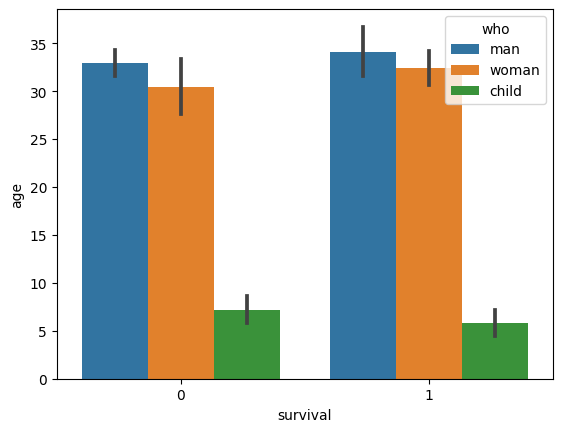

In [9]:
sns.barplot(data=df,x='survival',y='age',hue='who')

# Bar plot of survival by sex

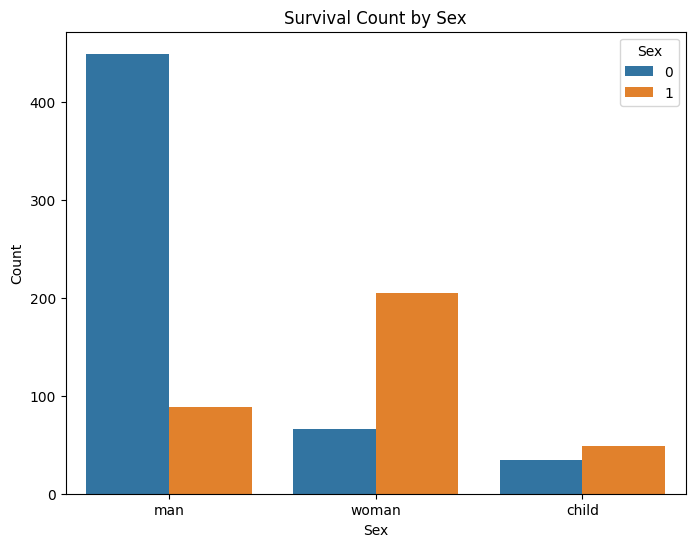

In [10]:
# Distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt
# Bar plot of survival by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='who', hue='survival', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

# Calculate survival counts for females and males

In [11]:

# Calculate survival counts for females and males
survived_females = df[(df['sex'] == 'female') & (df['survival'] == 1)].shape[0]
survived_males = df[(df['sex'] == 'male') & (df['survival'] == 1)].shape[0]

# Compare survival counts
if survived_females > survived_males:
    print("More females survived compared to males.")
elif survived_females < survived_males:
    print("More males survived compared to females.")
else:
    print("Equal number of females and males survived.")


More females survived compared to males.


# Calculate the total number of passengers

In [12]:
# Calculate the total number of passengers
total_passengers = len(df)

# Define the age range (20 to 40 years old)
age_range = df[(df['age'] >= 20) & (df['age'] <= 40)]

# Calculate the number of passengers within the age range
passengers_in_age_range = len(age_range)

# Calculate the proportion of passengers within the age range
proportion_in_age_range = passengers_in_age_range / total_passengers

# Define a threshold for considering "most" passengers
threshold = 0.5  # Assuming "most" means more than 50%

# Check if the proportion of passengers within the age range exceeds the threshold
if proportion_in_age_range > threshold:
    print("Most passengers were between 20 and 80 years old.")
else:
    print("Most passengers were not between 20 and 40 years old.")


Most passengers were not between 20 and 40 years old.


# Scatter plot of age vs. fare

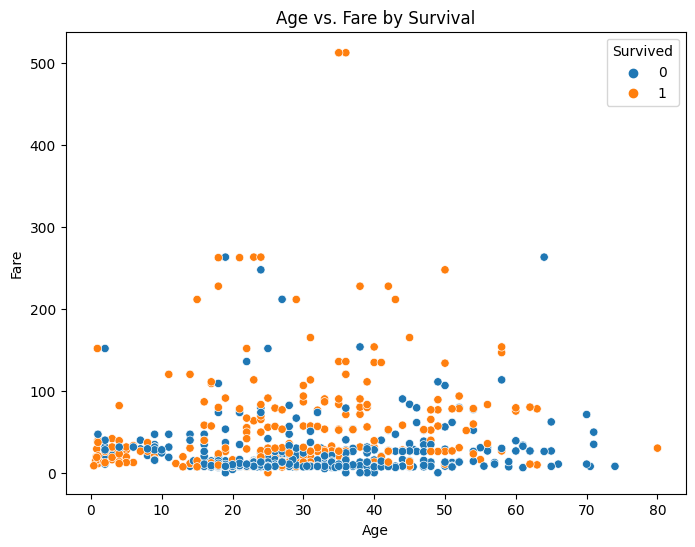

In [13]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='survival', data=df)
plt.title('Age vs. Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

### This plot give us the info that some persons between age 30-40 in the titanic can pay more fare as compared to others 

<Axes: xlabel='sex', ylabel='fare'>

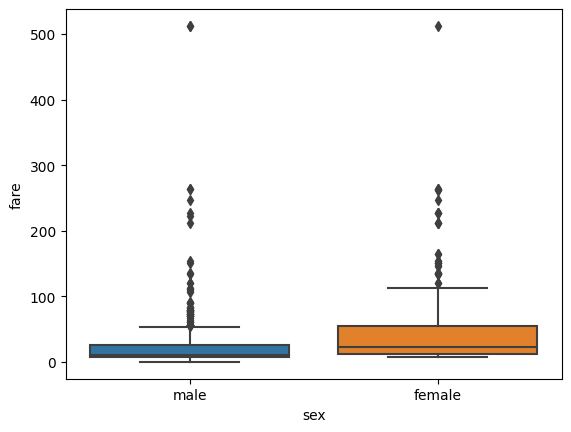

In [14]:
sns.boxplot(df,y='fare' ,x='sex')

### This box plot show us that in man or females some  pay more fair  

<Axes: xlabel='fare', ylabel='Count'>

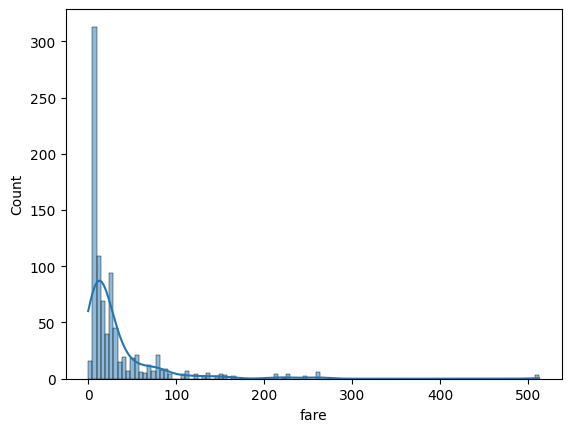

In [15]:
sns.histplot(df,x='fare' , kde=1)

<Axes: xlabel='age', ylabel='Count'>

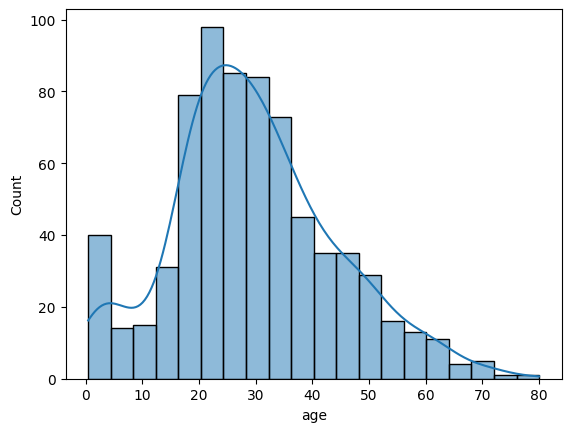

In [16]:
sns.histplot(df,x='age',kde=1)

### this plot gives info that 20-40 aged persons are more than others in titanic

# Data Cleaning

## 1- first deal with missing values

In [17]:
# check missing values in percentage
df.isnull().sum() /len(df) * 100

survival        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
family_size     0.000000
dtype: float64

<Axes: >

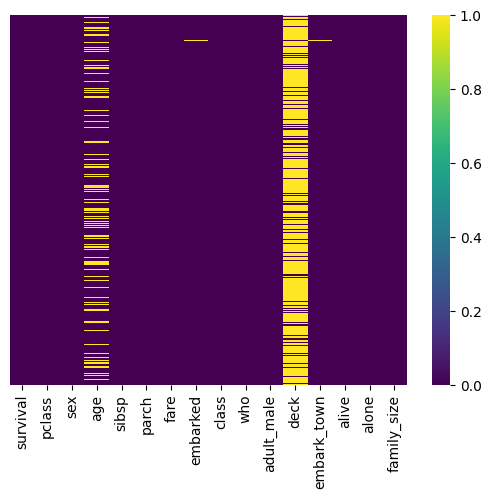

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### The deck NaN values is more than 77 percent so this column is not such important so we remove this column 

In [19]:

df.drop(columns='deck', inplace=True)
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


Now we impute the NaN values with mean median mode to remove further NaN values

In [20]:
df['age'] = df.age.fillna(value=df['age'].mean())
df['embarked'] = df.embarked.fillna(value=df['embarked'].mode()[0])
df['embark_town'] = df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [21]:
df.isnull().sum() /len(df) * 100

survival       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
family_size    0.0
dtype: float64

<Axes: >

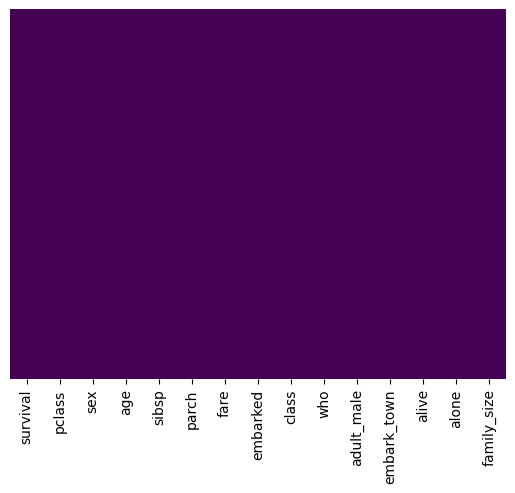

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 2- Finding And Dropping Duplicates

In [23]:
df.shape

(891, 15)

In [24]:
df.duplicated().sum()

111

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(780, 15)

## 3- Outliers removal
### i) step 1- visualization

<Axes: xlabel='sex', ylabel='fare'>

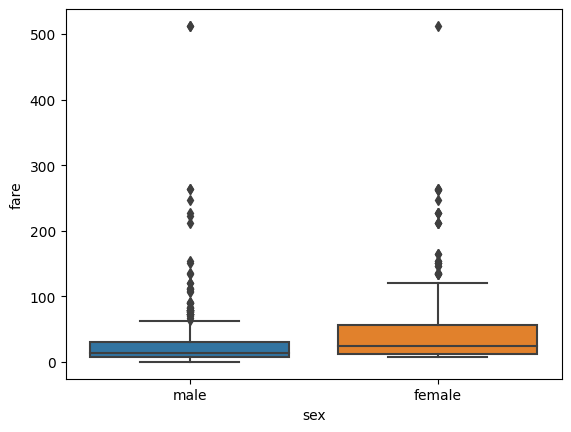

In [27]:
sns.boxplot(df,y='fare' ,x='sex')

#### in this plot we see that there is outliers on upper line of boxes which indicates that these persons can pay more fare as compared to other 
#### here we remove these outliers to normalise our data

### ii) Step 2 - IQR Method

Apply IQR Method To Remove Outliers in Fare Data

In [28]:
df['fare'] = df.age.fillna(value=df['fare'].mean())

In [29]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['fare']>lower_bound)&(df['fare']<upper_bound)]

14.25


<Axes: xlabel='sex', ylabel='fare'>

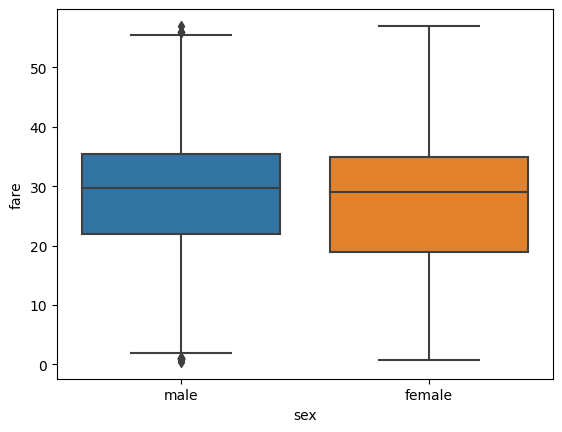

In [30]:
sns.boxplot(df,y='fare' ,x='sex')

<Axes: xlabel='fare', ylabel='Count'>

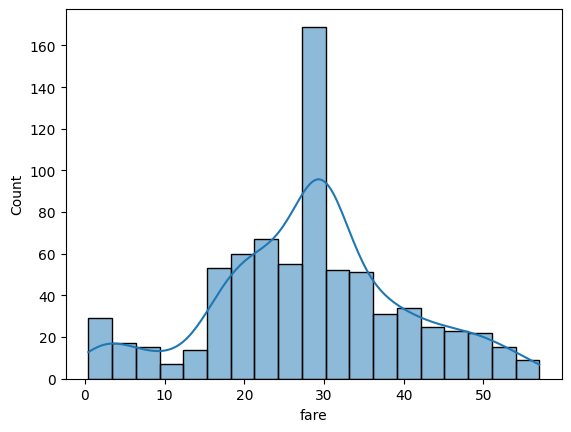

In [31]:
sns.histplot(df,x='fare',kde=1)

# Check the outliers by Z-Score Method

In [32]:
import numpy as np
df_copy = df.copy()
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold
df_copy['fare'] = df_copy['fare'].astype('bool')
# Apply the function to your DataFrame df
outliers = detect_outliers_zscore(df_copy['fare'])

# Count the number of outliers
num_outliers = outliers.sum()

# Print the number of outliers
print(f"Number of outliers: {num_outliers}")

Number of outliers: 0


In [33]:
import numpy as np
df_copy = df.copy()
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold
df_copy['sex'] = df_copy['sex'].astype('bool')
# Apply the function to your DataFrame df
outliers = detect_outliers_zscore(df_copy['sex'])

# Count the number of outliers
num_outliers = outliers.sum()

# Print the number of outliers
print(f"Number of outliers: {num_outliers} so we dont need any removing outlier method to remove further outliers because our data is now normalized")

Number of outliers: 0 so we dont need any removing outlier method to remove further outliers because our data is now normalized


# Data Exploration

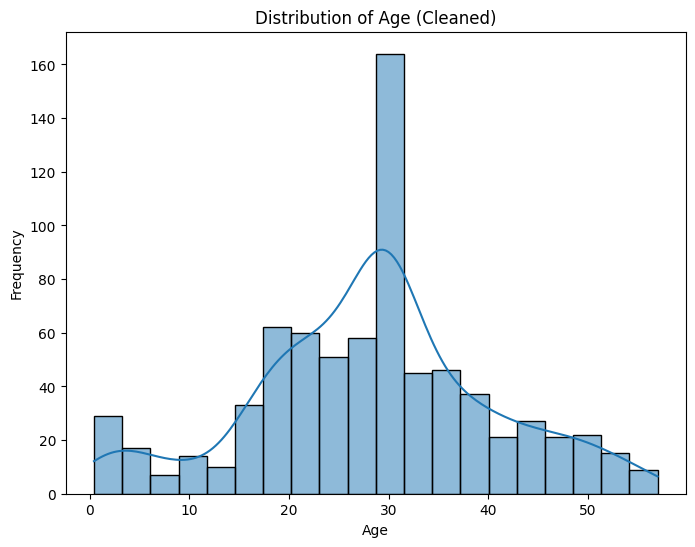

In [34]:

# Distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age (Cleaned)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [35]:
df['sex'] = df['sex'].astype('string')

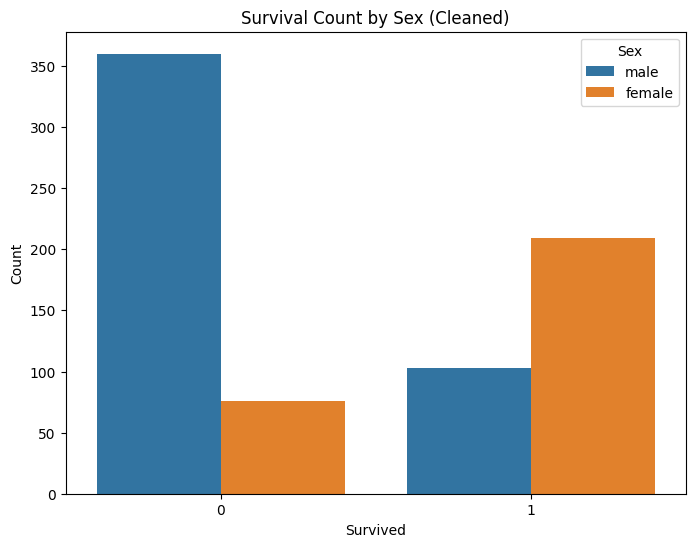

In [36]:
# Bar plot of survival by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='survival', hue='sex', data=df)
plt.title('Survival Count by Sex (Cleaned)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


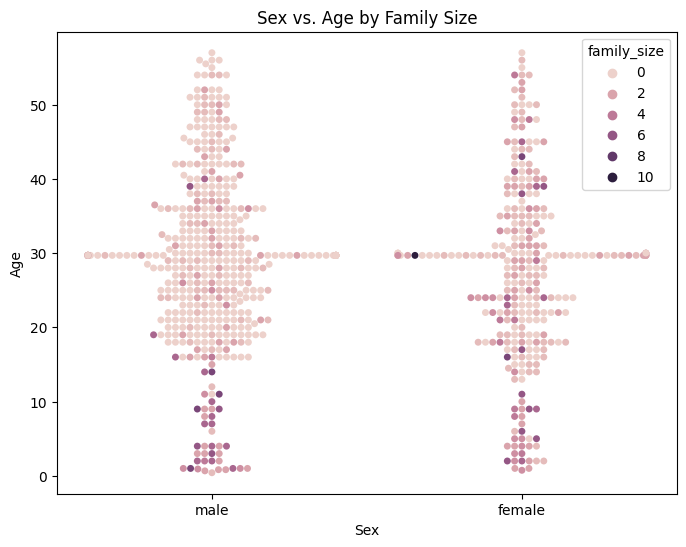

In [37]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df,x='sex',y='age',hue='family_size')
plt.title('Sex vs. Age by Family Size')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='family_size', loc='upper right')
plt.show()

#### The relationship between age and fare with survival remains unclear even after cleaning the data

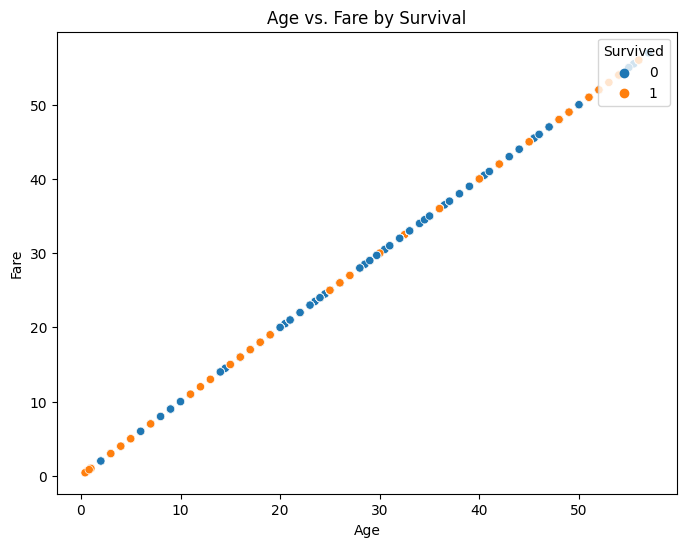

In [38]:
# Scatter plot of age vs. fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='survival', data=df)
plt.title('Age vs. Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()


After handling missing values and outliers, the distribution of age appears more normal.

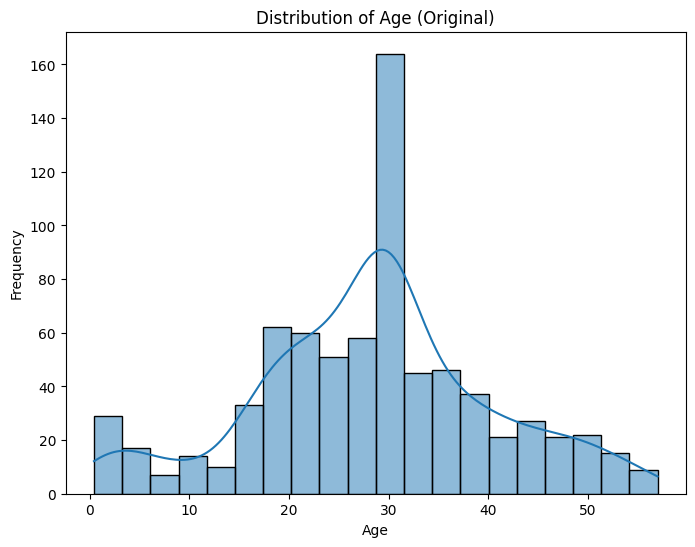

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age (Original)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Question And Answers

### Q1 : What is the overall survival rate of passengers?

In [40]:
survival_rate = df['survival'].mean() * 100
print(f"The overall survival rate is: {survival_rate:.2f}%")


The overall survival rate is: 41.71%


### Q2 : What is the distribution of passengers by class?

In [41]:
passenger_class_distribution = df['pclass'].value_counts()
print("Passenger distribution by class:")
print(passenger_class_distribution)

Passenger distribution by class:
pclass
3    398
1    191
2    159
Name: count, dtype: int64


### Q3 : What is the age distribution of passengers?

In [42]:
age_distribution = df['age'].describe()
print("Age distribution of passengers:")
print(age_distribution)

Age distribution of passengers:
count    748.000000
mean      28.347097
std       11.975671
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       57.000000
Name: age, dtype: float64


### Q4 : What is the average fare paid by passengers?

In [43]:
average_fare = df['fare'].mean()
print(f"The average fare paid by passengers is: ${average_fare:.2f}")

The average fare paid by passengers is: $28.35


### Q5 : How many passengers embarked from each port?

In [44]:
embarkation_port_count = df['who'].value_counts()
print("Passenger count by embarkation port:")
print(embarkation_port_count)

Passenger count by embarkation port:
who
man      423
woman    243
child     82
Name: count, dtype: int64


### Q6 : What is the survival rate based on gender?

In [45]:
survival_by_gender = df.groupby('sex')['survival'].mean() * 100
print("Survival rate by gender:")
print(survival_by_gender)

Survival rate by gender:
sex
female    73.333333
male      22.246220
Name: survival, dtype: float64


### Q7 : Is there a correlation between age and fare paid?

In [46]:
correlation_age_fare = df['age'].corr(df['fare'])
print(f"The correlation coefficient between age and fare paid is: {correlation_age_fare:.2f}")

The correlation coefficient between age and fare paid is: 1.00


### Q8 : How many passengers traveled alone and how many with family?

In [47]:
df['family'] = df['sibsp'] + df['parch']
alone_passengers = sum(df['family'] == 0)
with_family_passengers = sum(df['family'] > 0)
print(f"Passengers traveling alone: {alone_passengers}")
print(f"Passengers traveling with family: {with_family_passengers}")

Passengers traveling alone: 419
Passengers traveling with family: 329


![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)